<h1><center>EE4371 - Final Exam</center></h1>
<h3><center>Om Shri Prasath, EE17B113</center></h3>
<hr style=\"border:2px solid gray\"> </hr>

__1. You are given an array of n elements, and you notice that some of the elements are duplicates; that is,
they appear more than once in array. Show how to remove all duplicates from the array in time $O(n\log{n})$__

Given an collection of n elements, we need to remove duplicates from the collection. Assuming we do not need to keep the order, the
operation can be done as follows :
1. We sort the array, using either quick sort or merge sort to sort the array
2. Once the array is sorted, we do the following :

    A. If the length of the array is 1, we just return it. Else:
    
    B. We keep two iterators i and j which are initialized to 0 and 1
    
    C. If element at position i is not equal to j, we increment i and write the element present at i into j and then increment j too
    
    D. Otherwise we just increment j
    
    E. We continue the loop until j reaches the end of the array
    
    F. We return the elements present from 0:i+1 as the non-duplicates array output.

<hr style=\"border:1px solid gray\"> </hr>

In [1]:
def remove_duplicates(arr):
    n = len(arr)
    arr.sort()
    i = 0
    j = 1
    while j < n:
        if arr[i] != arr[j]:
            i += 1
            arr[i] = arr[j]
        j += 1
    return arr[: i + 1]

<hr style=\"border:2px solid gray\"> </hr>

__2. Given an array A of $n$ integers in the range $[0, n^2 - 1]$, describe a simple method for sorting A in $O(n)$ time.__

The idea is to use Radix Sort. Let there be d digits in input integers. Radix Sort takes $O(d*(n+b))$ time where b is the base for representing numbers, for example, for decimal system, b is 10. Since n2-1 is the maximum possible value, the value of d would be $O(logb(n))$. So overall time complexity is $O((n+b)*O(logb(n))$. Which looks more than the time complexity of comparison based sorting algorithms for a large k. The idea is to change base b. If we set b as n, the value of $O(logb(n)) $becomes $O(1)$ and overall time complexity becomes $O(n)$. 

<hr style=\"border:1px solid gray\"> </hr>

In [2]:
def count_sort(arr, p, n):
    output = [0] * n
    counts = [0] * n
    for i in arr:
        counts[(i // p) % n] += 1
    for i in range(1, n):
        counts[i] += counts[i - 1]
    for i in arr[::-1]:
        output[counts[(i // p) % n] - 1] = i
        counts[(i // p) % n] -= 1
    return output

def radix_sort(arr):
    n = len(arr)
    arr = count_sort(arr, 1, n)
    arr = count_sort(arr, n, n)
    return arr

<hr style=\"border:2px solid gray\"> </hr>

__3. Describe a non-recursive algorithm for enumerating all permutations of the numbers $\{1, 2, \dots,n\}$ using an
explicit stack.__

We use the Heap's algorithm which is given as follows : 

    procedure generate(n : integer, A : array of any):        
        for i := 0; i < n; i += 1 do
            c[i] := 0
        end for

        output(A)

        //i acts similarly to the stack pointer
        i := 0;
        while i < n do
            if  c[i] < i then
                if i is even then
                    swap(A[0], A[i])
                else
                    swap(A[c[i]], A[i])
                end if
                output(A)
                c[i] += 1
                i := 0
            else
                c[i] := 0
                i += 1
            end if
        end while

<hr style=\"border:1px solid gray\"> </hr>

In [4]:
def generate_permutations(n):
    arr = list(range(1, n + 1))
    state = [0] * n
    print(arr)
    i = 0
    while i < n:
        if state[i] < i:
            if i & 1:
                arr[state[i]], arr[i] = arr[i], arr[state[i]]
            else:
                arr[0], arr[i] = arr[i], arr[0]
            print(arr)
            state[i] += 1
            i = 0
        else:
            state[i] = 0
            i += 1

<hr style=\"border:2px solid gray\"> </hr>

__4. Suppose Dijkstra’s algorithm is run on the following graph, starting at node A.__

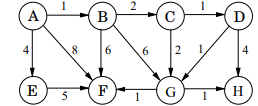

__(a) Draw a table showing the intermediate distance values all the nodes at each iteration of the algorithm.__

__(b) Show the final shortest-path tree.__

<hr style=\"border:1px solid gray\"> </hr>

(a) The Dijktra's algorithm with intermediate distance values is as follows (represented as intermediate distance, parent node): 

|From A → | B | C | D | E | F | G | H |
|---  |---|---|---|---|---|---|---|
| __A__ | 1,A  | ∞,-  | ∞,-  | 4,A  | 8,A  | ∞,-  | ∞,-  |
| __B__ | 1,A  | 3,B  | ∞,-  | 4,A  | 7,B  | 7,B  | ∞,-  |
| __C__ | 1,A  | 3,B  | 4,C  | 4,A  | 7,B  | 5,C  | ∞,-  |
| __D__ | 1,A  | 3,B  | 4,C  | 4,A  | 7,B  | 5,C  | 8,D  |
| __E__ | 1,A  | 3,B  | 4,C  | 4,A  | 7,B  | 5,C  | 8,D  |
| __G__ | 1,A  | 3,B  | 4,C  | 4,A  | 6,G  | 5,C  | 6,G  |
| __F__ | 1,A  | 3,B  | 4,C  | 4,A  | 6,G  | 5,C  | 6,G  |
| __H__ | 1,A  | 3,B  | 4,C  | 4,A  | 6,G  | 5,C  | 6,G  |


(b) The final shortest-path tree starting from A is given as is :

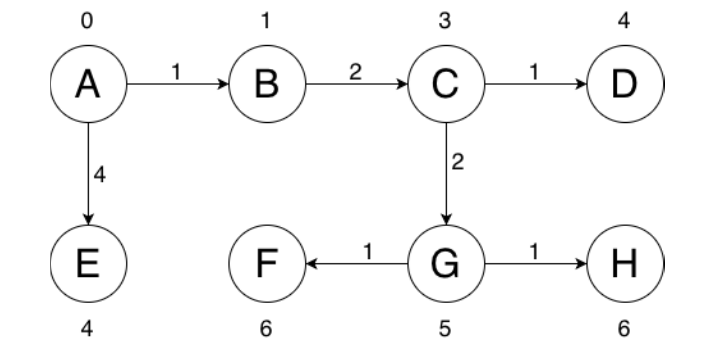

<hr style=\"border:2px solid gray\"> </hr>

__5. Describe an efficient greedy algorithm in python for making change for a specified value using a minimum
number of coins, assuming there are four denominations of coins (called quarters, dimes, nickels, and
pennies), with values 25, 10, 5, and 1, respectively.__

We use the greedy method by trying to use the highest denomination coins to fill the value. If we cannot use the current highest denomination coin, then we move to the next and start searching again.

<hr style=\"border:1px solid gray\"> </hr>

In [5]:
def change(val):
    changes = [25,10,5,1]
    res = {}
    i=0
    total_coins = 0
    for i in range(4):
        res[changes[i]] = val//changes[i]
        total_coins+=res[changes[i]]
        val = val - changes[i]*(val//changes[i])
        i-=1

<hr style=\"border:2px solid gray\"> </hr>

__6. Design an efficient algorithm in python for the matrix chain multiplication problem that outputs a fully
parenthesized expression for how to multiply the matrices in the chain using the minimum number of
operations.__

Let `shapes` denote the array of shapes of the matrix and `dp[i][j]` denote the cost of computing the product of matrices from position `i` to `j`. To compute the best way to calculate the product from `i` to `k`, we try to first compute the product from `i` to `k` and `k+1` to `j`, and then find the product between the results. The cost of computing product `i` to `k` is `dp[i][k]` and the cost of computing product from `k+1` to `j` is `dp[k+1][j]`. The cost of computing the resulting product will be `shapes[i-1]*shapes[k]*shapes[j]`. Thus, the dynamic programming subproblem is given as :

$$
dp[i][j] = \min_{i\leq k < j} dp[i][k] + dp[k+1][j] + shapes[i-1]*shapes[k]*shapes[j]
$$

<hr style=\"border:1px solid gray\"> </hr>

In [6]:
def matrix_chain_order(shapes):

    mat = []

    n = len(shapes) - 1

    for i in range(n):
        mat.append(chr(ord("A") + i))

    dp = [[float("inf")] * (n + 1) for _ in range(n + 1)]

    dp_mat = [[""] * (n + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        dp[i][i] = 0
        dp_mat[i][i] = mat[i - 1]

    for l in range(2, n + 1):
        for i in range(1, n - l + 2):
            j = i + l - 1
            for k in range(i, j):
                q = dp[i][k] + dp[k + 1][j] + shapes[i - 1] * shapes[k] * shapes[j]

                s = "(" + dp_mat[i][k] + dp_mat[k + 1][j] + ")"

                if q < dp[i][j]:
                    dp[i][j] = q
                    dp_mat[i][j] = s

    return (dp[1][n], dp_mat[1][n])